<a href="https://colab.research.google.com/github/israelnicolau/imersao_alura_data_science/blob/main/imersao_alura_desafios_aula3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Preparando dados

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

url_dados = "https://github.com/alura-cursos/imersaodados3/blob/main/dados/dados_experimentos.zip?raw=true"
dados = pd.read_csv(url_dados, compression='zip')
dados.columns = dados.columns.str.replace('-','')

###Desafio 01: Criar tabelas de frequência com pandas.groupby()

In [16]:
dados.groupby('tratamento').mean()[['tempo']]

,tempo
tratamento,
com_controle,48.077170
com_droga,48.015309


###Desafio 02: Normalizar o crosstab pela coluna

In [19]:
pd.crosstab([dados['dose'], dados['tempo']],dados['tratamento'], normalize='columns')

tratamento  com_controle  com_droga
dose tempo                         
D1   24         0.161308   0.163341
     48         0.183816   0.182750
     72         0.164523   0.164024
D2   24         0.163451   0.163158
     48         0.163451   0.163614
     72         0.163451   0.163113

###Desafio 03: Explorar outros agregadores

In [20]:
pd.crosstab([dados['dose'], dados['tempo']],dados['tratamento'], values = dados['g-0'], aggfunc = 'sum')

tratamento  com_controle  com_droga
dose tempo                         
D1   24         -75.7799  1319.2648
     48         -42.1113  1654.4150
     72         -90.6483  1030.5010
D2   24           3.2800   412.7202
     48           4.0180   770.1980
     72          21.4262   907.3112

In [21]:
pd.crosstab([dados['dose'], dados['tempo']],dados['tratamento'], values = dados['g-0'], aggfunc = 'max')

tratamento  com_controle  com_droga
dose tempo                         
D1   24            3.226      9.908
     48            3.423     10.000
     72            2.584      9.355
D2   24            2.601      7.167
     48            4.335     10.000
     72            4.670     10.000

###Desafio 04: Explorar o melt

In [ ]:
dados.groupby('droga').mean().melt()

###Desafio 05: Calcular e analisar a correlação entre G e C. Refletir sobre efeitos biológicos

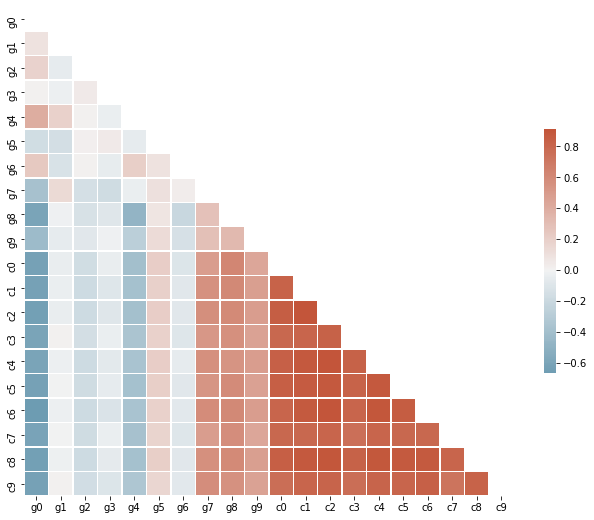

In [47]:
corr_cg = dados.loc[:,'g0':'g9'].merge(dados.loc[:,'c0':'c9'], on=dados['id']).corr()
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr_cg, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_cg, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

###Desafio 06: Estudar o código que plota a matriz de correlação (heatmap)

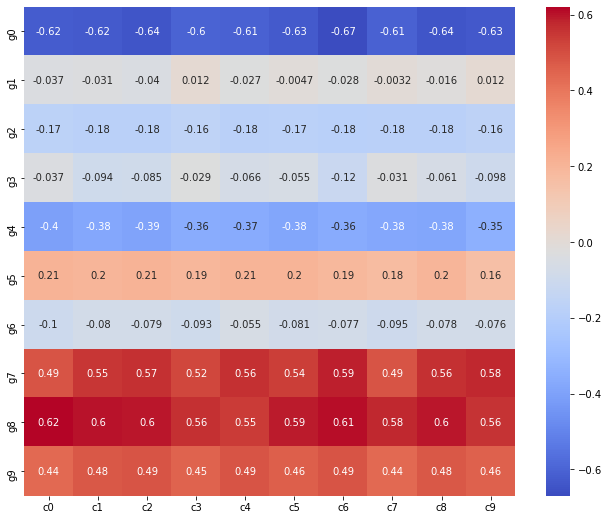

In [58]:
corr_cg = dados.loc[:,'g0':'g9'].merge(dados.loc[:,'c0':'c9'], on=dados['id']).corr()

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_cg.iloc[:10, 10:], cmap='coolwarm', annot=True)

###Desafio 07: Resumo do que você aprendeu com os dados

Aprendi a correlacionar dados, o que acredito ser umas das coisas mais importantes do Data Science, e pude aprender diversas novas funções para tal, como groupby(), corr(), crosstab() etc.